<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_3/ds_mod3_lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import date
import seaborn as sns
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)

url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'
dados = pd.read_csv(url, sep=";", parse_dates=[4])
dados_sp = dados.query("nome_munic == 'São Paulo'")
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()
dados_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,media_movel_casos,media_movel_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,NaN,NaN
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,NaN,NaN
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,NaN,NaN
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,NaN,NaN


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


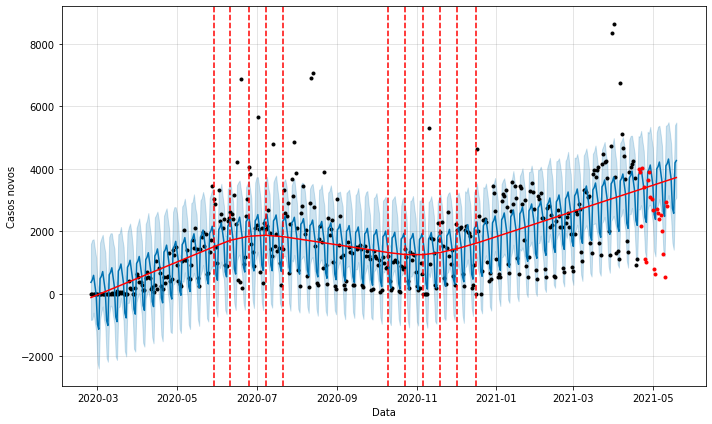

In [8]:
df = pd.DataFrame()
cut = 420
prevision_date = 30
df['ds'] = dados_sp['datahora'][:cut]
df['y'] = dados_sp['casos_novos'][:cut]
# df['cap'] = 6000
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][cut:]changepoint_prior_scale
df_teste['y'] = dados_sp['casos_novos'][cut:]

modelo = Prophet()#changepoints=['2021-01-01'])#growth='logistic')
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=prevision_date)
# dataframefuturo['cap'] = 4000
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6))
plt.plot(df_teste['ds'], df_teste['y'], '.r')
add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()

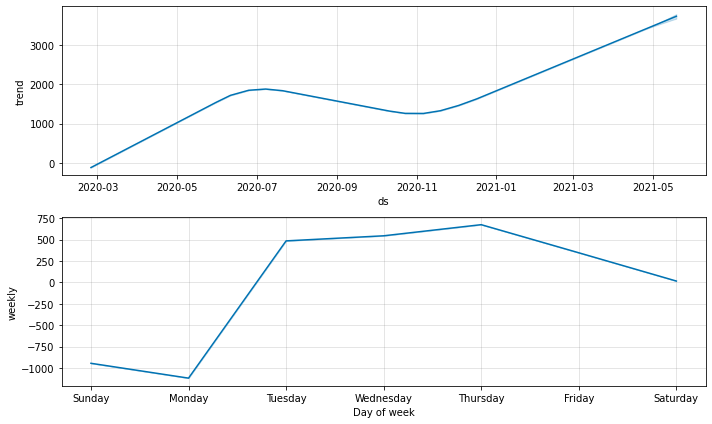

In [9]:
modelo.plot_components(previsao, figsize=(10,6));

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


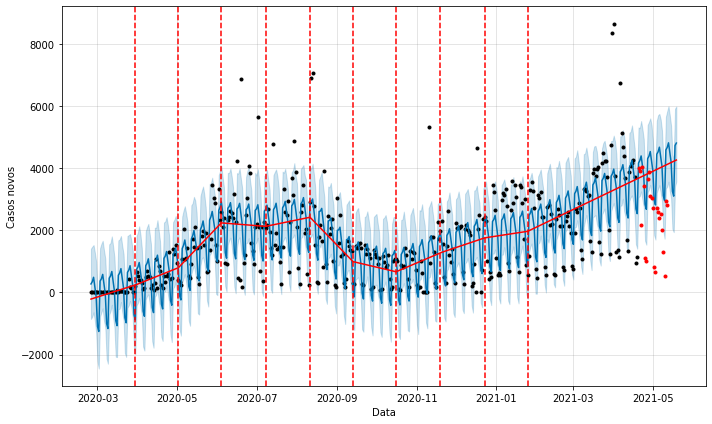

In [21]:
modelo = Prophet(n_changepoints=10, changepoint_prior_scale=5)
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=prevision_date)
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6))
plt.plot(df_teste['ds'], df_teste['y'], '.r')
add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()

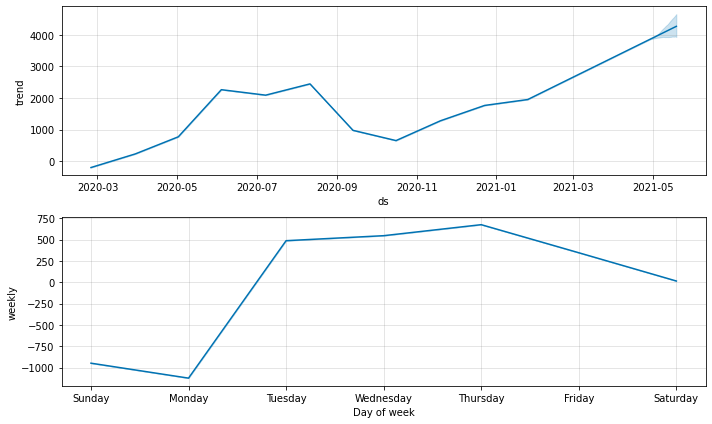

In [19]:
modelo.plot_components(previsao, figsize=(10,6));

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


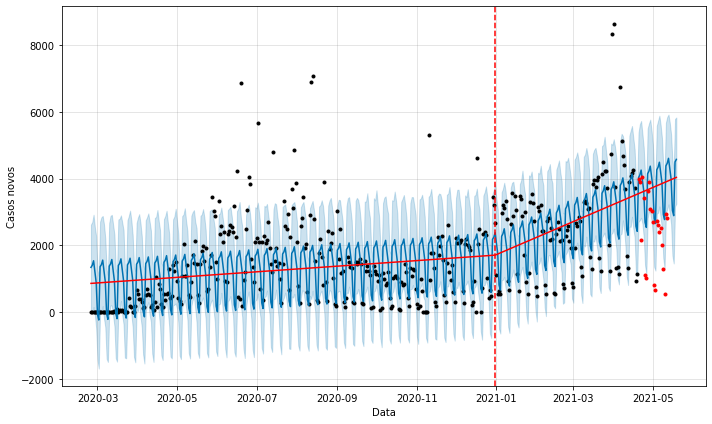

In [24]:
modelo = Prophet(changepoints=['2020-12-31'],
                 n_changepoints=10,
                 changepoint_prior_scale=5,)
                 ##growth='logistic')
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=prevision_date)
# dataframefuturo['cap'] = 4000
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6))
plt.plot(df_teste['ds'], df_teste['y'], '.r')
add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()

# Desafios

## Desafio 11: Identificar potenciais changepoints.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


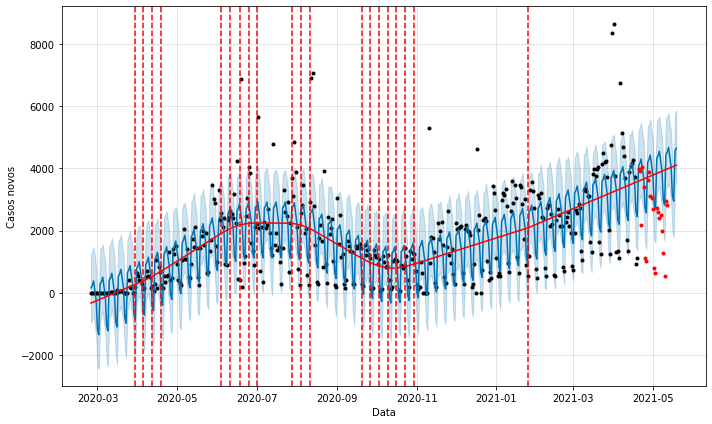

In [58]:
modelo = Prophet(#changepoints=['2020-12-31'],
                 n_changepoints=50,
                 changepoint_prior_scale=0.5,)
                 ##growth='logistic')
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=prevision_date)
# dataframefuturo['cap'] = 4000
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(10,6))
plt.plot(df_teste['ds'], df_teste['y'], '.r')
add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



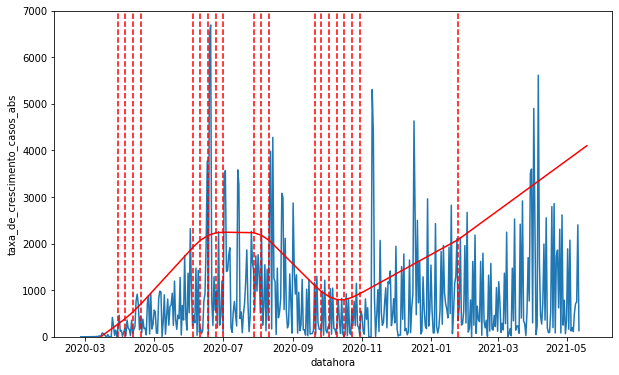

In [55]:
dados_sp['taxa_de_crescimento_casos_abs'] = abs(dados_sp['taxa_de_crescimento_casos'])

fig= plt.figure(figsize=(10,6))
ax = sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_casos_abs',)#ax=ax)
ax.set_ylim(0,7000)
add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.show()

## Desafio 12: Desenvolver uma função roda o modelo automaticamente.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


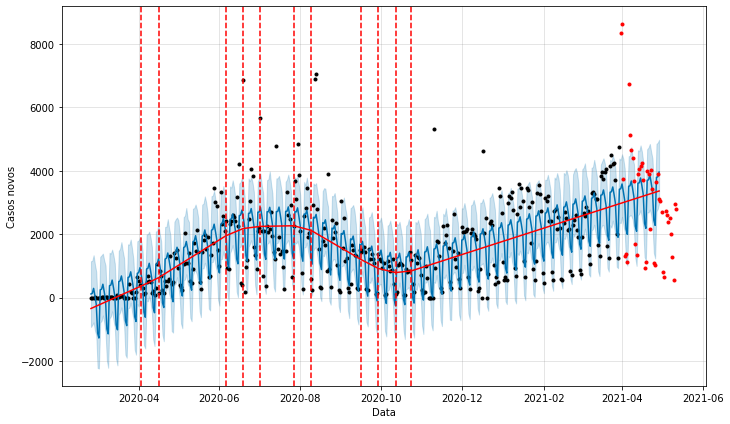

In [64]:
def basic_model(data, x, y, xlabel=None, ylabel=None,
                cut=400,
                prevision_date=30,
                n_changepoints=25,
                changepoint_prior_scale=0.5):
  if xlabel is None:
    xlabel = x
  if ylabel is None:
    ylabel = y
  df = pd.DataFrame()
  df['ds'] = data[x][:cut]
  df['y'] = data[y][:cut]
  df_teste = pd.DataFrame()
  df_teste['ds'] = data[x][cut:]
  df_teste['y'] = data[y][cut:]
  modelo = Prophet(
      n_changepoints=n_changepoints,
      changepoint_prior_scale=changepoint_prior_scale,)
  modelo.fit(df)
  dataframefuturo = modelo.make_future_dataframe(periods=prevision_date)
  previsao = modelo.predict(dataframefuturo)

  fig = modelo.plot(previsao, xlabel=xlabel, ylabel=ylabel, figsize=(10,6))
  plt.plot(df_teste['ds'], df_teste['y'], '.r')
  add_changepoints_to_plot(fig.gca(), modelo, previsao)
  plt.show()

basic_model(data=dados_sp, x='datahora', y='casos_novos',
            xlabel='Data', ylabel='Casos novos',
            cut=400,  prevision_date=30, n_changepoints=25,
            changepoint_prior_scale=0.5)